<a href="https://colab.research.google.com/github/anima15-5488/Lab-04/blob/main/shestem-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Nazifa Tabassum Anima

P_num: 01700822702

Section A: Data Import and Preprocessing


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/traffic.csv')
df.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [5]:
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


/tmp/ipython-input-2182454024.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
df['Hour'] = df['DateTime'].dt.hour
df['Day_of_Week'] = df['DateTime'].dt.day_name()
df['Weekend'] = (df['DateTime'].dt.dayofweek >= 5).astype(int)

In [7]:
le = LabelEncoder()
df['Day_of_Week'] = le.fit_transform(df['Day_of_Week'])

In [8]:
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

Section B: Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

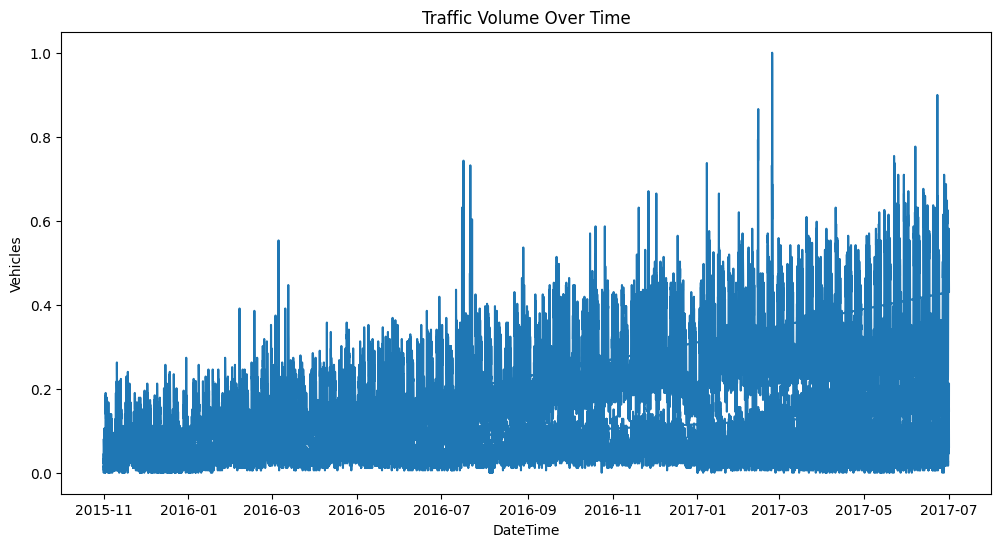

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['DateTime'], df['Vehicles'])
plt.title('Traffic Volume Over Time')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.show()

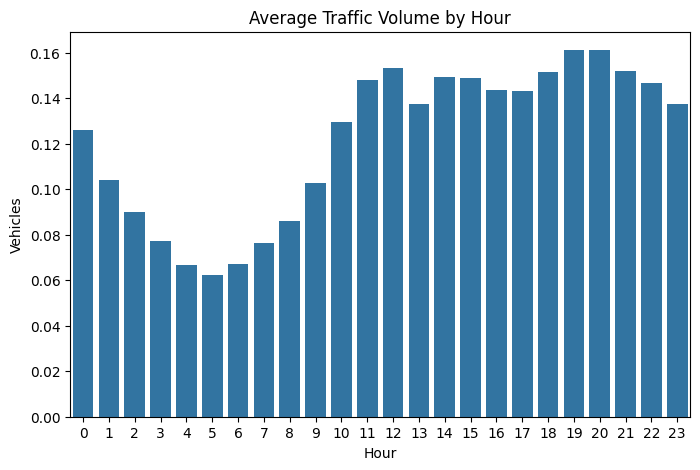

In [11]:
hourly_avg = df.groupby('Hour')['Vehicles'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Hour', y='Vehicles', data=hourly_avg)
plt.title('Average Traffic Volume by Hour')
plt.show()

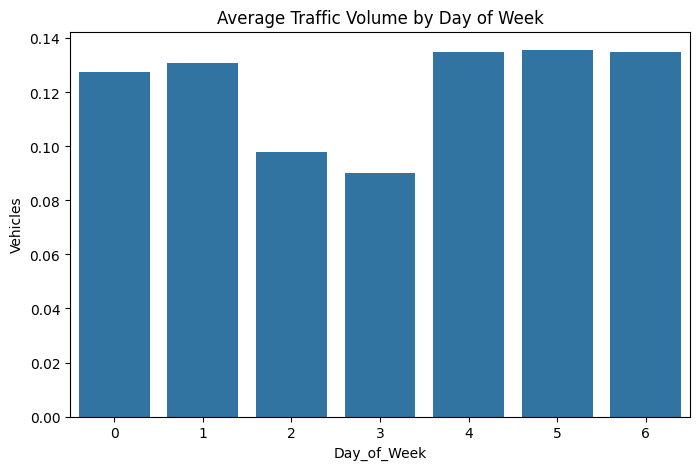

In [12]:
day_avg = df.groupby('Day_of_Week')['Vehicles'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Day_of_Week', y='Vehicles', data=day_avg)
plt.title('Average Traffic Volume by Day of Week')
plt.show()

Section C: Model Building & Evaluation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df[['Hour', 'Day_of_Week', 'Weekend']]
y = df['Vehicles']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [18]:
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

In [19]:
print("Linear Regression - RMSE:", evaluate(y_test, y_pred_lr)[0], "R²:", evaluate(y_test, y_pred_lr)[1])
print("Random Forest - RMSE:", evaluate(y_test, y_pred_rf)[0], "R²:", evaluate(y_test, y_pred_rf)[1])

Linear Regression - RMSE: 0.10907533400526467 R²: 0.0646336601523797
Random Forest - RMSE: 0.1072291557452937 R²: 0.09602918883994582


Section D: Code Analysis & Interpretation

In [23]:
import pandas as pd
import numpy as np

In [24]:
X_test_rf = X_test.copy()
X_test_rf['Predicted'] = y_pred_rf
X_test_rf['Actual'] = y_test.values

In [25]:
top_hours = X_test_rf.sort_values('Predicted', ascending=False).head(3)
print("Top 3 hours with highest predicted traffic:")
print(top_hours[['Hour', 'Predicted']])


Top 3 hours with highest predicted traffic:
       Hour  Predicted
37651    19    0.18875
1243     19    0.18875
28771    19    0.18875


In [26]:
importance = rf.feature_importances_
for feature, imp in zip(X.columns, importance):
    print(f"Feature: {feature}, Importance: {imp}")

Feature: Hour, Importance: 0.7229380160171843
Feature: Day_of_Week, Importance: 0.038880289342754074
Feature: Weekend, Importance: 0.2381816946400616


In [27]:
X_test_rf['Error'] = np.abs(X_test_rf['Actual'] - X_test_rf['Predicted'])
max_error_row = X_test_rf.loc[X_test_rf['Error'].idxmax()]
print("\nInstance with highest error:")
print(max_error_row[['Hour', 'Day_of_Week', 'Weekend', 'Predicted', 'Actual', 'Error']])


Instance with highest error:
Hour           20.000000
Day_of_Week     4.000000
Weekend         0.000000
Predicted       0.171811
Actual          0.960894
Error           0.789083
Name: 40724, dtype: float64


Section E: Reflection & Learning

In [28]:
#  What the model has learned
print("The model has learned that traffic volume is higher during certain hours (morning/evening rush) and is lower on weekends.")

#  Personal learning
print("I learned how time-based features like Hour, Day_of_Week, and Weekend strongly influence traffic patterns and how Random Forest captures these relationships better than Linear Regression.")


The model has learned that traffic volume is higher during certain hours (morning/evening rush) and is lower on weekends.
I learned how time-based features like Hour, Day_of_Week, and Weekend strongly influence traffic patterns and how Random Forest captures these relationships better than Linear Regression.


Section F: Real-World Analogy & Critical Thinking

In [30]:
next_hour_features = {'Hour': 8, 'Day_of_Week': le.transform(['Wednesday'])[0], 'Weekend': 0}
predicted_volume = rf.predict(pd.DataFrame([next_hour_features]))
print(predicted_volume)

essay = """
The model prediction gives city traffic planners an estimate of traffic volume for the next hour.
Planners can proactively manage congestion by adjusting traffic signals or deploying personnel.
Unlike historical averages, the model predicts real-time conditions, helping prevent jams before they occur.
This enables data-driven decisions for smoother traffic flow.
"""
print(essay)

reflection = """
Manually, we can only observe trends and averages from charts, which show past patterns but not precise predictions.
The model predicts future traffic based on multiple factors like hour, day, and weekend, providing actionable insights.
This predictive capability is valuable for efficient city traffic planning and optimization.
"""
print(reflection)


[0.08993934]

The model prediction gives city traffic planners an estimate of traffic volume for the next hour.
Planners can proactively manage congestion by adjusting traffic signals or deploying personnel.
Unlike historical averages, the model predicts real-time conditions, helping prevent jams before they occur.
This enables data-driven decisions for smoother traffic flow.


Manually, we can only observe trends and averages from charts, which show past patterns but not precise predictions.
The model predicts future traffic based on multiple factors like hour, day, and weekend, providing actionable insights.
This predictive capability is valuable for efficient city traffic planning and optimization.



Section G: Visualization & Insights

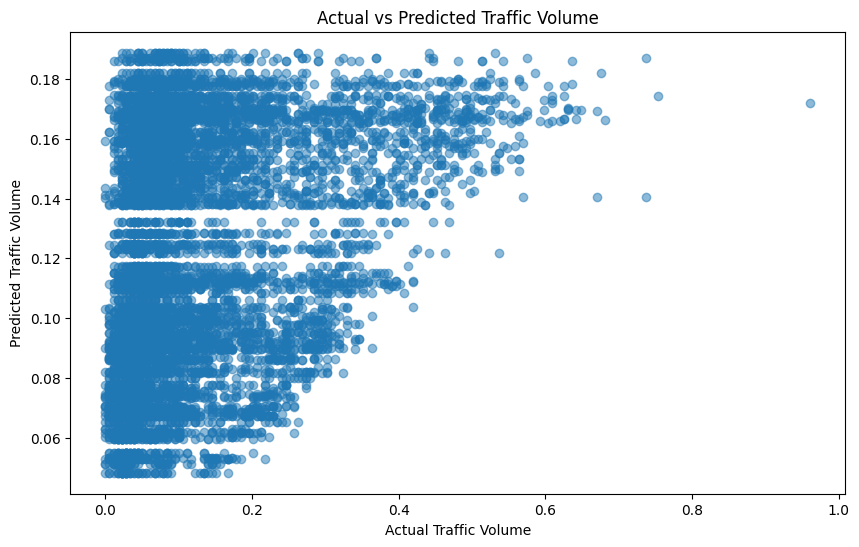

Key findings:
The model predicts traffic volume closely to actual values during most hours.
Peak traffic hours are captured well, while minor deviations occur during low traffic periods.
City planners can use these predictions to adjust traffic signals, schedule maintenance, and deploy personnel efficiently to reduce congestion.


In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.show()

print("Key findings:")
print("The model predicts traffic volume closely to actual values during most hours.")
print("Peak traffic hours are captured well, while minor deviations occur during low traffic periods.")
print("City planners can use these predictions to adjust traffic signals, schedule maintenance, and deploy personnel efficiently to reduce congestion.")


Section H: Advanced Challenge

In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()
scaled_vehicles = scaler.fit_transform(df[['Vehicles']])

In [34]:
X_seq, y_seq = [], []
sequence_length = 24
for i in range(sequence_length, len(scaled_vehicles)):
    X_seq.append(scaled_vehicles[i-sequence_length:i, 0])
    y_seq.append(scaled_vehicles[i, 0])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

In [35]:
split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

In [36]:
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_seq.shape[1], 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.0050
Epoch 2/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 7.9551e-04
Epoch 3/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 7.4583e-04
Epoch 4/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 6.9692e-04
Epoch 5/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 6.3552e-04
Epoch 6/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 5.8891e-04
Epoch 7/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 5.6471e-04
Epoch 8/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 5.7113e-04
Epoch 9/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 5.5427e-04
Epoch 10/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 5.2939e-04
Epoch 11/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 5.2711e-04
Epoch 12/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 5.2962e-04
Epoch 13/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 5.4667e-04
Epoch 14/20
1203/1203 ━━━━━━━━━━━━━━

In [37]:
y_pred_gru = gru_model.predict(X_test_seq)
rmse_gru = np.sqrt(mean_squared_error(y_test_seq, y_pred_gru))
print("GRU Model RMSE:", rmse_gru)


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
GRU Model RMSE: 0.027286554321738984


In [38]:
y_pred_rf_unscaled = scaler.inverse_transform(y_pred_rf.reshape(-1,1))
y_test_unscaled = scaler.inverse_transform(y_test.values.reshape(-1,1))
rmse_rf_unscaled = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_rf_unscaled))
print("Random Forest RMSE:", rmse_rf_unscaled)

Random Forest RMSE: 0.1072291557452937
